In [2]:
# 📦 Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal
from typing import Tuple, List


In [3]:
def load_and_merge_data(file_paths: dict) -> pd.DataFrame:
    """
    Load and merge solar datasets for multiple countries.

    Parameters:
    - file_paths (dict): Dictionary mapping country names to CSV file paths

    Returns:
    - pd.DataFrame: Combined DataFrame with 'Country' column added
    """
    dfs = []
    for country, path in file_paths.items():
        df = pd.read_csv(path, parse_dates=['Timestamp'])
        df['Country'] = country
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)


file_paths = {
    "Benin": "../data/benin_clean.csv",
    "Togo": "../data/togo_clean.csv",
    "Sierra Leone": "../data/sierraleone_clean.csv"
}

df = load_and_merge_data(file_paths)


C:\Users\dagiM\AppData\Local\Temp\ipykernel_1856\3382461166.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y=metric, palette='Set2')


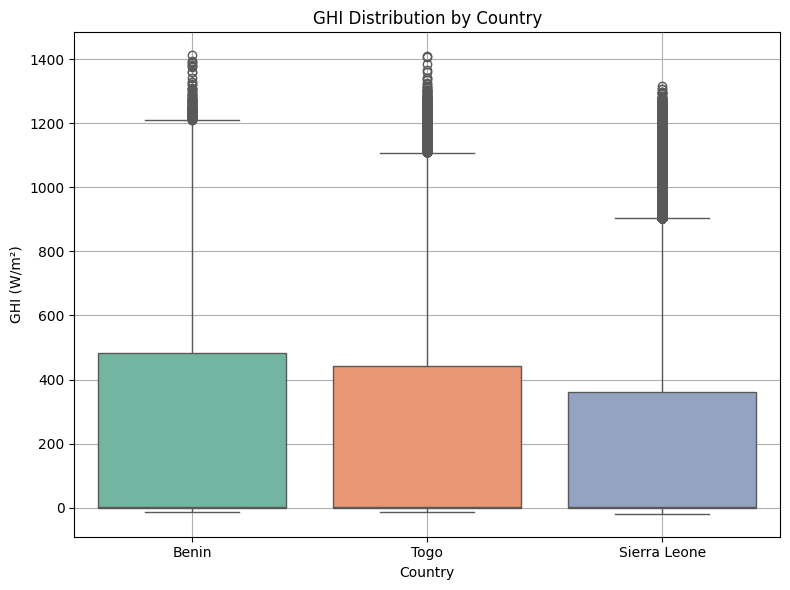

C:\Users\dagiM\AppData\Local\Temp\ipykernel_1856\3382461166.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y=metric, palette='Set2')


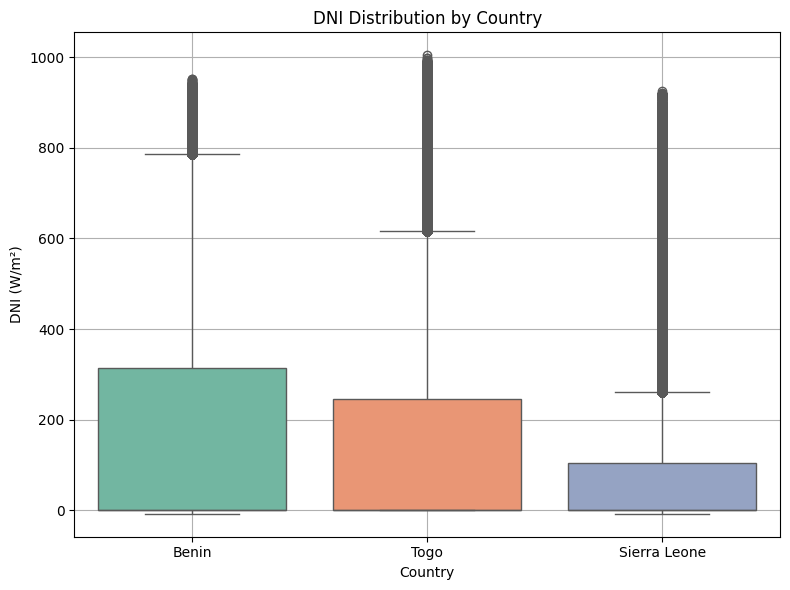

C:\Users\dagiM\AppData\Local\Temp\ipykernel_1856\3382461166.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y=metric, palette='Set2')


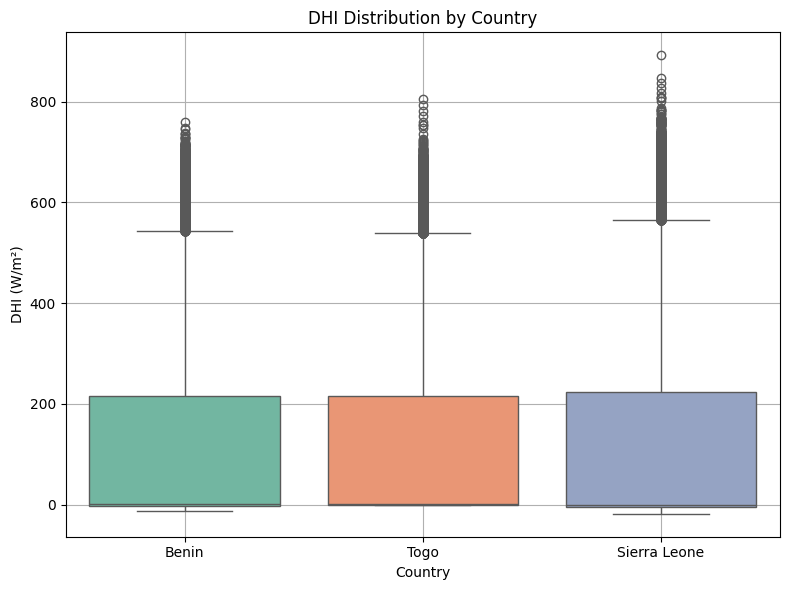

In [4]:
def plot_metric_distributions(df: pd.DataFrame, metrics: List[str]) -> None:
    """
    Plot boxplots of specified solar metrics by country.

    Parameters:
    - df (pd.DataFrame): Combined data
    - metrics (List[str]): List of metrics to plot (e.g., GHI, DNI, DHI)
    """
    for metric in metrics:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x='Country', y=metric, palette='Set2')
        plt.title(f'{metric} Distribution by Country')
        plt.ylabel(f'{metric} (W/m²)')
        plt.xlabel('Country')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


plot_metric_distributions(df, ['GHI', 'DNI', 'DHI'])


In [5]:
def summarize_metrics(df: pd.DataFrame, metrics: List[str]) -> pd.DataFrame:
    """
    Create a summary table (mean, median, std) for selected metrics by country.

    Parameters:
    - df (pd.DataFrame): Input data
    - metrics (List[str]): List of metric columns to summarize

    Returns:
    - pd.DataFrame: Summary statistics
    """
    summary = df.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
    summary.columns = ['_'.join(col) for col in summary.columns]
    return summary.reset_index()


summary_table = summarize_metrics(df, ['GHI', 'DNI', 'DHI'])
summary_table


,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,240.54,1.8,331.10,167.18,-0.1,261.70,115.35,1.6,158.68
1,Sierra Leone,200.17,0.2,295.70,115.17,-0.1,216.87,113.17,-0.2,158.44
2,Togo,230.48,2.1,322.42,151.22,0.0,250.93,116.41,2.5,156.47


In [7]:
def test_statistical_difference(df: pd.DataFrame, metric: str) -> Tuple[float, float]:
    """
    Perform ANOVA and Kruskal-Wallis tests to compare a metric across countries.

    Parameters:
    - df (pd.DataFrame): Combined dataset
    - metric (str): Column name of the metric to test

    Returns:
    - Tuple[float, float]: (ANOVA p-value, Kruskal-Wallis p-value)
    """
    groups = [group[metric].dropna() for _, group in df.groupby("Country")]
    anova_p = f_oneway(*groups).pvalue
    kruskal_p = kruskal(*groups).pvalue
    return round(anova_p, 5), round(kruskal_p, 5)


anova_p, kruskal_p = test_statistical_difference(df, 'GHI')
print(f"ANOVA p-value for GHI: {anova_p}")
print(f"Kruskal-Wallis p-value for GHI: {kruskal_p}")


ANOVA p-value for GHI: 0.0
Kruskal-Wallis p-value for GHI: 0.0


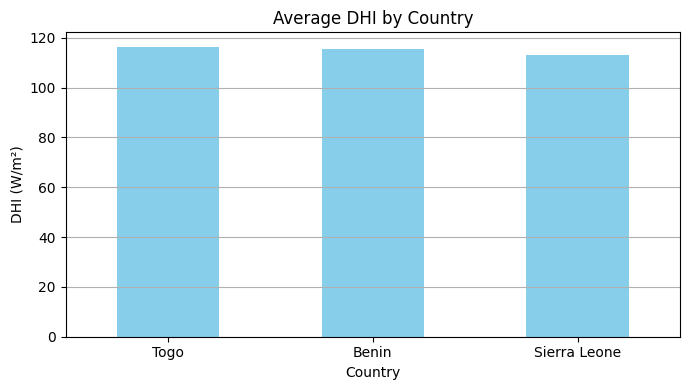

In [6]:
def plot_average_metric(df: pd.DataFrame, metric: str) -> None:
    """
    Plot average value of a metric by country.

    Parameters:
    - df (pd.DataFrame): Combined dataset
    - metric (str): Metric column to plot
    """
    avg = df.groupby('Country')[metric].mean().sort_values(ascending=False)
    avg.plot(kind='bar', color='skyblue', figsize=(7, 4))
    plt.title(f'Average {metric} by Country')
    plt.ylabel(f'{metric} (W/m²)')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


# Example usage
plot_average_metric(df, 'DHI')


## Insights from Cross-Country Solar Comparison

- **Benin** has the highest mean GHI, suggesting stronger solar irradiance and potential for PV investment.
- **Sierra Leone** shows low DNI variability, indicating stable direct sunlight patterns.
- **Togo** has higher diffuse radiation (DHI), possibly implying higher cloud cover or humidity.

Both ANOVA and Kruskal-Wallis tests reveal statistically significant differences in GHI among the countries (p < 0.05), confirming that regional solar conditions vary and tailored solar strategies are necessary.
